In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [280]:
dataset1 = pd.read_csv('train.csv')
dataset1.shape

(1460, 81)

In [281]:
dataset2 = pd.read_csv('test.csv')
dataset2.shape

(1459, 80)

In [282]:
#La dataset2 a une colonne de moins que la dataset1 car la colonne 'SalePrice' y est manquante. 
#Fusionnons les 2 datasets

dataset = pd.concat([dataset1,dataset2],ignore_index=True)
pd.DataFrame(dataset).to_csv("fullData.csv", index= False)
dataset.shape

(2919, 81)

In [283]:
#Affichons les premières valeurs 
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [284]:
#Catégorisons les données en fonction de leurs types 

objets = (dataset.dtypes == 'object')
colonnes_objets = list(objets[objets].index)
print("Variables objets:",len(colonnes_objets))
    
entiers = (dataset.dtypes == 'int')
colonnes_entiers = list(entiers[entiers].index)
print("Variables entières:",len(colonnes_entiers))
    
flottants = (dataset.dtypes == 'float')
colonnes_flottants = list(flottants[flottants].index)
print("Float variables:",len(colonnes_flottants))

Variables objets: 43
Variables entières: 26
Float variables: 12


In [285]:
# Affichons les colonnes

dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [286]:
# Les colonnes sont nombreuses mais pas toutes utiles forcément.

# Recherchons les valeurs manquantes afin de commencer un netoyage. Affichons les par ordre du plus au moins manquant.

df_null = pd.DataFrame([dataset.isnull().sum(),round(100 * dataset.isnull().sum()/
                    len(dataset),2), dataset.dtypes]).transpose().reset_index()
df_null.columns = ["variable", "valeur", "Pourcentage", "type"]
df_null = df_null[df_null.valeur != 0].sort_values("valeur",ascending = False).reset_index(drop = True)

In [287]:
df_null

,variable,valeur,Pourcentage,type
0,PoolQC,2909,99.66,object
1,MiscFeature,2814,96.4,object
2,Alley,2721,93.22,object
3,Fence,2348,80.44,object
4,SalePrice,1459,49.98,float64
5,FireplaceQu,1420,48.65,object
6,LotFrontage,486,16.65,float64
7,GarageCond,159,5.45,object
8,GarageYrBlt,159,5.45,float64
9,GarageFinish,159,5.45,object


In [288]:
# En parcourant les informations de la data description, nous pouvons faire les observations suivantes :

# 'PoolQC' manquant + pas pertinent -> 'PoolArea' est beaucoup mieux et suffisant
# Idem pour 'MiscFeature', 'Alley', 'Fence'(manquantes à 80%) + pas pertients -> 'OverallCond' est suffisant.

# 'SalePrice' est une donnée CAPITALE alors nous devons la conserver. 
# Les données manquantes seront remplacées par la moyenne des prix.

# 'FireplaceQu': manquant + non pertinent -> 'Fireplaces' peut le remplacer.
# 'LotFrontage' : inutile -> 'LotArea' est suffisant.
# 'GarageCond', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageType' : manquants + non pertinents 
# -> l'acheteur veut juste savoir s'il y a un garage et si oui, sa taille donc 'GarageArea' suffit.

# Idem pour BsmtExposure, BsmtCond, BsmtQual, BsmtFinType2, BsmtFinType1 -> Nous privilégions les champs BsmtFinSF2 et TotalBsmtSF. 
# Nous abandonnons aussi BsmtFinSF1 car BsmtFinSF1 =  TotalBsmtSF - BsmtFinSF2;

# MasVnrType, MasVnrArea : non pertinents 
# Exterior2nd : non pertinent -> Exterior1st suffit
# SaleType : non pertinent -> SaleCondition
# KitchenQual : non pertinet -> KitchenAbvGr
# Electrical : non pertinents -> 'Utilities'
# Idem pour centralAir, HeatingQC, Heating : non pertinents -> Utilities;
# Le champ ID aussi n'apporte aucune information.
# etc ...


# Ainsi, après analyse de données manquantes et étude de la "data description", nous retiendrons les champs suivants :

colonnes_utiles = ['MSSubClass','MSZoning','LotArea','Utilities','LotConfig','BldgType','OverallCond','YearBuilt',
                    'YearRemodAdd','Exterior1st','BsmtFinSF2','TotalBsmtSF','2ndFlrSF','FullBath','BedroomAbvGr',
                    'KitchenAbvGr','Fireplaces','GarageArea','PoolArea','SaleCondition','SalePrice']

In [289]:
len(colonnes_utiles)

21

In [290]:
# Les colonnes à supprimer sont donc :

allColumns = list(dataset.columns)
colonnes_inutiles = []
for item in range(len(allColumns)):
    if allColumns[item] not in colonnes_utiles:
        colonnes_inutiles.append(allColumns[item])

In [291]:
len(colonnes_inutiles)

60

In [292]:
# Effectuons un premier nettoyage en supprimant les colonnes "inutiles"

dataset.drop(colonnes_inutiles, axis=1, inplace=True)
pd.DataFrame(dataset).to_csv("fullDataCleaned_1.csv", index= False)

In [293]:
#La nouvelle taille de la dataset

dataset.shape

(2919, 21)

In [294]:
#Catégorisons à nouveau les données en fonction de leurs types 

objets = (dataset.dtypes == 'object')
colonnes_objets = list(objets[objets].index)
print("Variables objets:",len(colonnes_objets))
    
entiers = (dataset.dtypes == 'int')
colonnes_entiers = list(entiers[entiers].index)
print("Variables entières:",len(colonnes_entiers))
    
flottants = (dataset.dtypes == 'float')
colonnes_flottants = list(flottants[flottants].index)
print("Float variables:",len(colonnes_flottants))

Variables objets: 6
Variables entières: 11
Float variables: 4


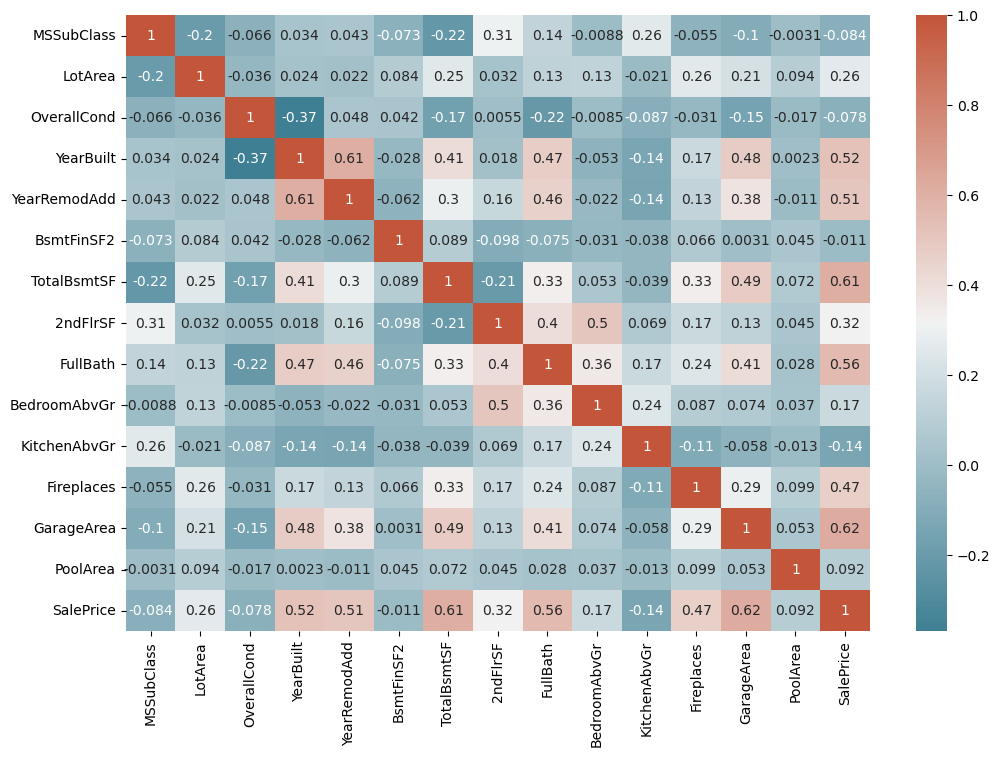

In [295]:
# Analyse exploratoire des données : Matrice de corrélation pour l'analyse des valeurs numériques
plt.figure(figsize=(12, 8))
correlation = dataset.corr()
sns.heatmap(correlation,xticklabels = correlation.columns,yticklabels = correlation.columns,annot=True,cmap=sns.diverging_palette(220,20,as_cmap=True))
plt.show()

<AxesSubplot:title={'center':'Variables catégorielles - valeurs uniques'}>

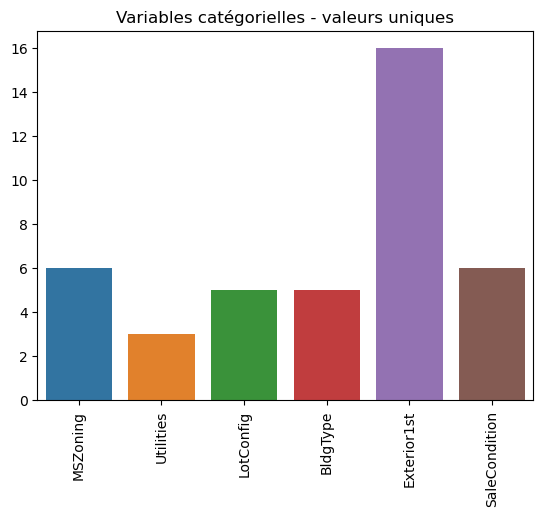

In [296]:
# Pour les variables de type objet, traçons un graphiques à barres pour les analyser

valeurs_uniques = []
for colonne in colonnes_objets:
  valeurs_uniques.append(dataset[colonne].unique().size)
plt.figure()
plt.title('Variables catégorielles - valeurs uniques')
plt.xticks(rotation= 90)
sns.barplot(x= colonnes_objets,y= valeurs_uniques)

In [297]:
# Continuons notre nettoyage de données : Identifions les colonnes qui contiennent des valeurs nulles

dataset.isnull().sum()

MSSubClass          0
MSZoning            4
LotArea             0
Utilities           2
LotConfig           0
BldgType            0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
Exterior1st         1
BsmtFinSF2          1
TotalBsmtSF         1
2ndFlrSF            0
FullBath            0
BedroomAbvGr        0
KitchenAbvGr        0
Fireplaces          0
GarageArea          1
PoolArea            0
SaleCondition       0
SalePrice        1459
dtype: int64

In [298]:
# Comme énoncé plus haut, nous allons remplacer les cellules nulles du champ 'SalePrice' par la moyenne des prix afin d'équilibrer la dataset.

dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [299]:
# Nous remarquons que le champ 'Utilities' contient quasiment la même information sur toute la dataset

dataset['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [300]:
# Il n'est donc plus pertinent et il n'est plus nécessaire de le conserver. 

dataset.drop('Utilities', axis=1, inplace=True)

In [301]:
# Nous supprimons ensuite les lignes contenant des valeurs nulles, vu qu'il en reste très peu. 

newDataset = dataset.dropna()
pd.DataFrame(newDataset).to_csv("fullDataCleaned_2.csv", index= False)

In [302]:
# Vérifions à nouveau les colonnes à valeurs nulles 

newDataset.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
LotConfig        0
BldgType         0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Exterior1st      0
BsmtFinSF2       0
TotalBsmtSF      0
2ndFlrSF         0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageArea       0
PoolArea         0
SaleCondition    0
SalePrice        0
dtype: int64

In [303]:
# Notre dataset est épurée mais ce n'est pas fini. 
# Les variables catégorielles ne peuvent pas être traitées telles qu'elles sont. Nous avons besoin de les transformer. A cet effet, nous utilisons le OneHotEncoder

objets = (newDataset.dtypes == 'object')
liste_var_cat = list(objets[objets].index)
print("Variables catégorielles :")
print(liste_var_cat)
print('Nombre : ',len(liste_var_cat))

Variables catégorielles :
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st', 'SaleCondition']
Nombre :  5


In [304]:
# Appliquons le OneHot Encoding

OHEncoder = OneHotEncoder(sparse = False)
OHColonnes = pd.DataFrame(OHEncoder.fit_transform(newDataset[liste_var_cat]))
OHColonnes.index = newDataset.index
OHColonnes.columns = OHEncoder.get_feature_names_out()
datasetFinal = newDataset.drop(liste_var_cat, axis=1)
datasetFinal = pd.concat([datasetFinal, OHColonnes], axis=1)
pd.DataFrame(datasetFinal).to_csv("fullDataFinal.csv", index= False)

In [305]:
datasetFinal.shape

(2912, 51)

In [306]:
# Affichons les 5 premières lignes de notre dataset finale

print(datasetFinal.head(5))

   MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0          60     8450            5       2003          2003         0.0   
1          20     9600            8       1976          1976         0.0   
2          60    11250            5       2001          2002         0.0   
3          70     9550            5       1915          1970         0.0   
4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  2ndFlrSF  FullBath  BedroomAbvGr  ...  Exterior1st_Stucco  \
0        856.0       854         2             3  ...                 0.0   
1       1262.0         0         2             3  ...                 0.0   
2        920.0       866         2             3  ...                 0.0   
3        756.0       756         1             3  ...                 0.0   
4       1145.0      1053         2             4  ...                 0.0   

   Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  \
0           

In [307]:
# Nous voyons bien que les variables catégorielles ont été converties en nombres

# A présent, subdivisons notre dataset en ensembles d'entraînement et de test au ratio de 80% et 20%

X = datasetFinal.drop(['SalePrice'], axis=1)
Y = datasetFinal['SalePrice']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)
print('Xtrain',X_train.shape, 'Ytrain', Y_train.shape)

Xtrain (2329, 50) Ytrain (2329,)


In [308]:
# Notre cas d'étude est une prédiction de prix. Il s'agit de valeurs continues donc nous utilserons des algorithmes de regression. 

# Regression linéaire
# Random Forest
# SVM
# GradientBoostingRegressor

# Avec SVM
model_SVM = svm.SVR()
model_SVM.fit(X_train,Y_train)
Y_pred = model_SVM.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18705125687852966


In [309]:
# Avec Random Forest 

model_RFR = RandomForestRegressor(n_estimators = 10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1809066685780811


In [310]:
# Avec la regression linéaire 

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1794820036113368


In [311]:
#Avec la méthode de la descente des gradients

model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, Y_train)
Y_pred = model_GBR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.17748438563601393
